## Performing learning-to-rank with default setting

In [1]:
from org.archive.ltr_adhoc.eval.ltr import LTREvaluator
from org.archive.eval.parameter import DataSetting, EvalSetting, ModelParameter, ScoringFunctionParameter

''' dataset identifier '''
data_id = 'MQ2008_Super'

''' directory of the corresponding dataset '''
#dir_data = '/Users/dryuhaitao/WorkBench/Corpus/LETOR4.0/MQ2007/'
dir_data = '/Users/solar/WorkBench/Datasets/L2R/LETOR4.0/MQ2008/'

''' output directory for results '''
#dir_output='/Users/dryuhaitao/WorkBench/output/'
dir_output = '/Users/solar/WorkBench/CodeBench/PyCharmProject/Project_output/Out_L2R/'

''' the main class for conducting training & testing '''
ltr_evaluator = LTREvaluator()

debug = True # in a debug mode, we just check whether the model can operate

''' using the default setting for loading dataset & using the default setting for evaluation '''
ltr_evaluator.set_eval_setting(debug=debug, dir_output=dir_output)
ltr_evaluator.set_data_setting(debug=debug, data_id=data_id, dir_data=dir_data)
data_dict = ltr_evaluator.get_default_data_setting()
eval_dict = ltr_evaluator.get_default_eval_setting()

### Prepare data

In [2]:
''' load the dataset '''
train_data, test_data, vali_data = ltr_evaluator.load_data(eval_dict=eval_dict, data_dict=data_dict, fold_k=1)

Fold- 1
loading buffered file ...
loading buffered file ...


### Configuration of the neural scoring function

In [3]:
''' using the default setting for constructing a neural scoring function '''
ltr_evaluator.set_scoring_function_setting(debug=debug, data_dict=data_dict)
sf_para_dict = ltr_evaluator.get_default_scoring_function_setting()

### The specified model with default parameters


In [4]:
''' the parameter setting for a model '''
model_id = 'RankNet'
ltr_evaluator.set_model_setting(debug=debug, model_id=model_id)
model_para_dict = ltr_evaluator.get_default_model_setting()

''' basic check before loading the ranker '''
ltr_evaluator.setup_eval(data_dict=data_dict, eval_dict=eval_dict, sf_para_dict=sf_para_dict,
                         model_para_dict=model_para_dict)

''' initialize the ranker '''
ranknet   = ltr_evaluator.load_ranker(sf_para_dict=sf_para_dict, model_para_dict=model_para_dict)

### Plot functionality

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def show_var(list_vals, lbl=None):
    X = np.arange(start=1, stop=len(list_vals)+1).tolist()
    if lbl is not None:
        plt.plot(X, list_vals, label=lbl)
    else:
        plt.plot(X, list_vals)


### Train the learning-to-rank model and plot the performance

Text(0.5, 1.0, 'RankNet')

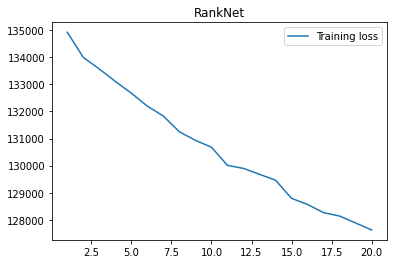

In [6]:
ranknet_losses, ranknet_train_ndcgs, ranknet_test_ndcgs = ltr_evaluator.naive_train(ranker=ranknet, eval_dict=eval_dict, train_data=train_data, test_data=test_data)

show_var(ranknet_losses, lbl='Training loss') # show the variation of loss
plt.legend()
plt.title('RankNet')
